<h2 style="text-align: center;">
Up-to-date Heart Attack Analysis
</h2>


#### Recognizing Variables in Dataset

| Feature   | Description                                                                                           |
|-----------|-------------------------------------------------------------------------------------------------------|
| **Age**   | Age of the patient                                                                                    |
| **Sex**   | Sex of the patient                                                                                   |
| **exang** | Exercise-induced angina (1 = yes; 0 = no)                                                             |
| **ca**    | Number of major vessels (0–3)                                                                         |
| **cp**    | Chest pain type:<br>• 1 = typical angina<br>• 2 = atypical angina<br>• 3 = non-anginal pain<br>• 4 = asymptomatic |
| **trtbps**| Resting blood pressure                                                                                |
| **chol**  | Serum cholesterol (mg/dl) fetched via BMI sensor                                                      |
| **fbs**   | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                 |
| **rest_ecg** | Resting electrocardiographic results:<br>• 0 = normal<br>• 1 = ST-T wave abnormality<br>• 2 = probable/definite left ventricular hypertrophy |
| **thalach**| Maximum heart rate achieved                                                                         |
| **target** | 0 = less chance of heart attack; 1 = more chance of heart attack                                      |


In [103]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("heart.csv")

In [107]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [109]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [113]:
df.columns = new_columns

In [115]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
df.shape

(303, 14)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Examining missing values

In [122]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
isnull_number = []
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

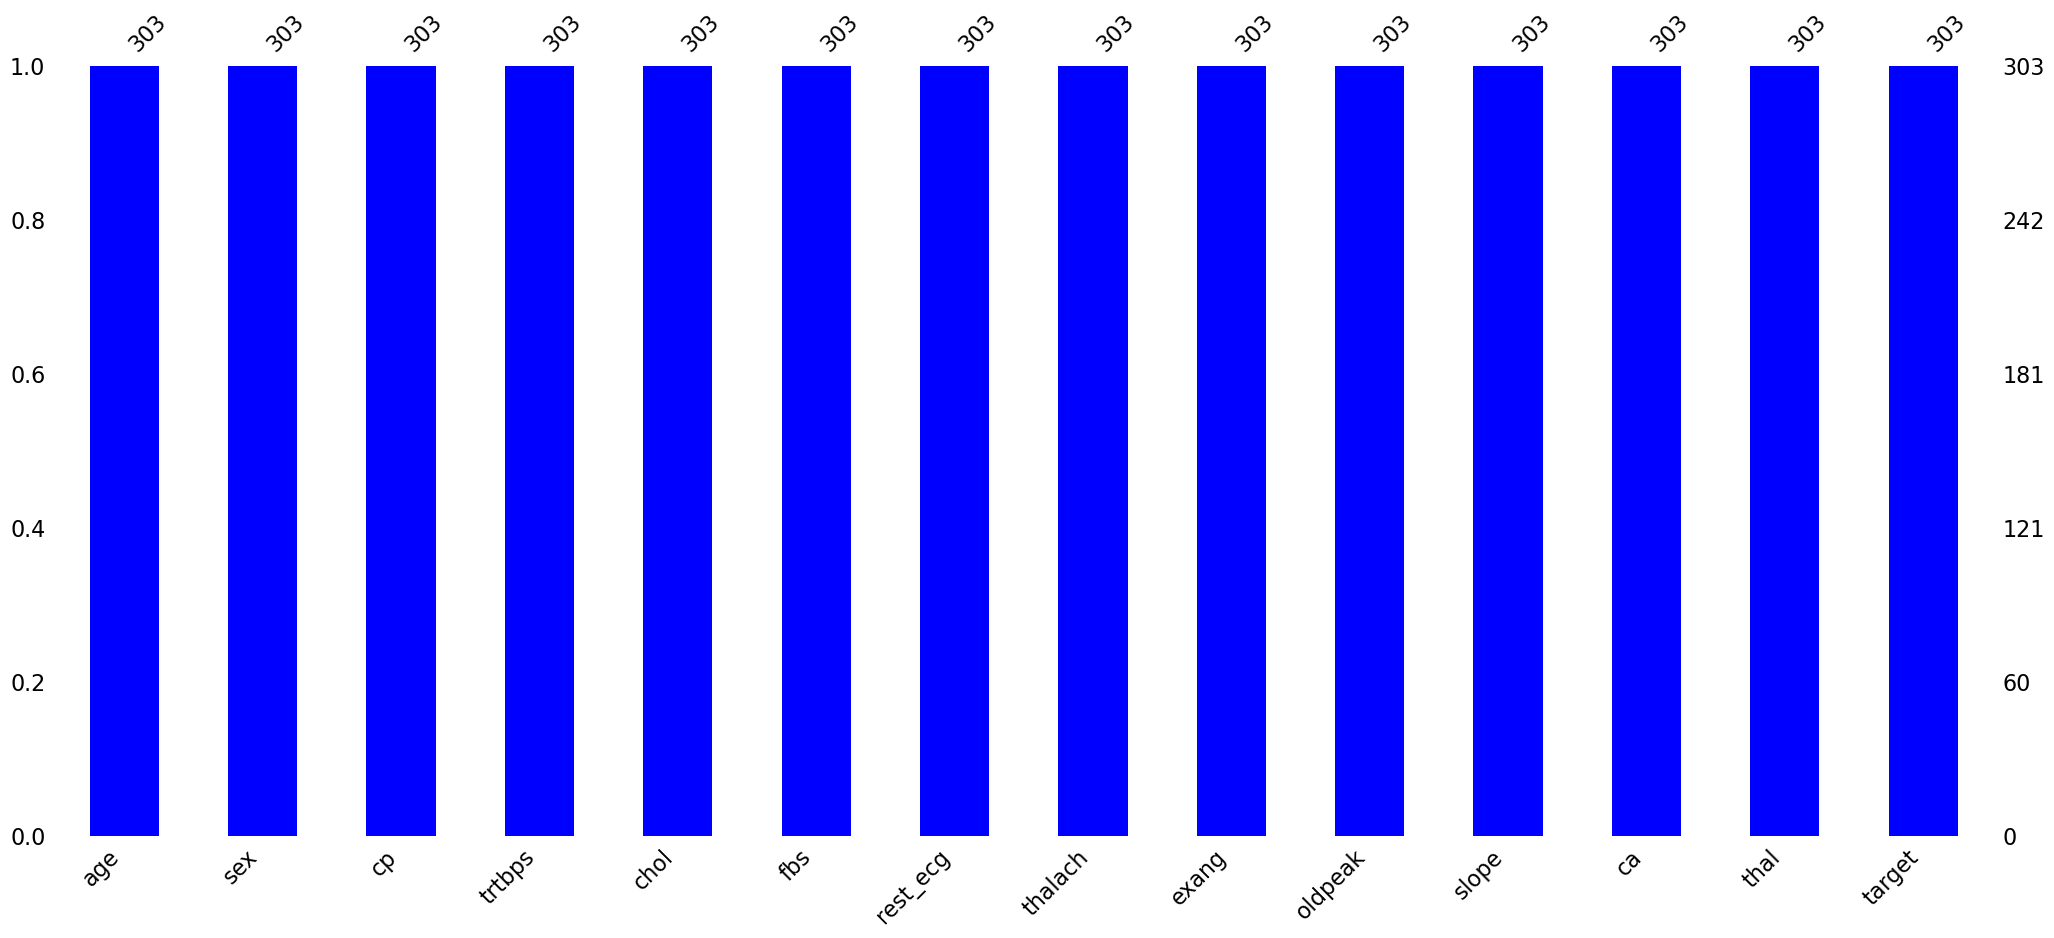

In [126]:
import missingno
missingno.bar(df,color="b")

#### Examining Unique Values

In [129]:
df["cp"].value_counts().count()

4

In [131]:
unique_number = []
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number,index=df.columns,columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [133]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak"]
categoric_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [135]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


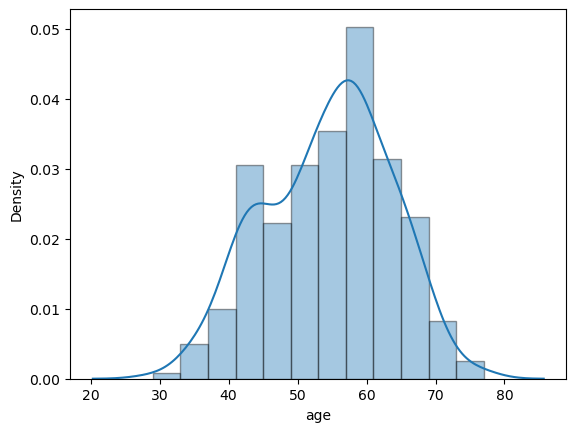

In [137]:
sns.distplot(df["age"],hist_kws = dict(linewidth=1,edgecolor = "k"));

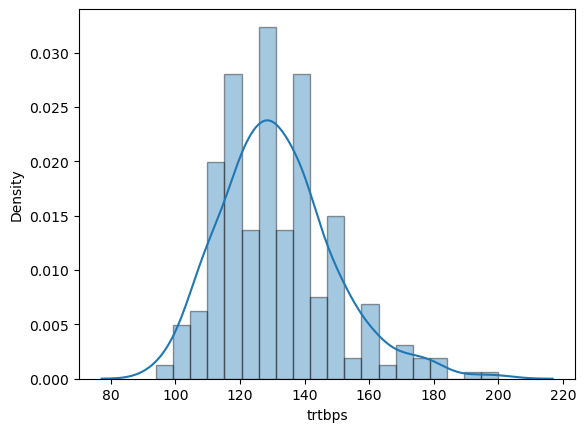

In [139]:
sns.distplot(df["trtbps"],hist_kws = dict(linewidth=1,edgecolor = "k"),bins=20);
#veri araligini 20 esit parcaya boler
#linewidth=1 Her çubuğun kenar çizgisinin kalınlığını (genişliğini) belirler.
#edgecolor da cubuklarin kenar rengini belirliyo

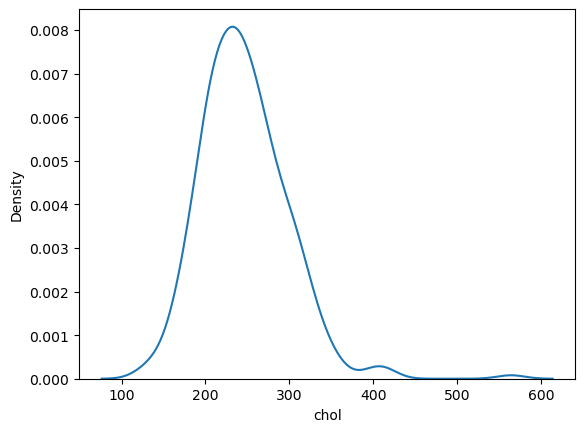

In [141]:
sns.distplot(df["chol"],hist = False);

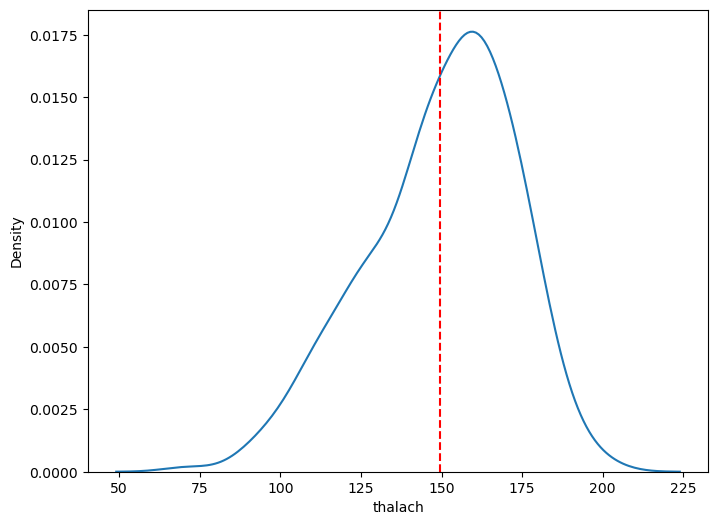

In [143]:
x,y = plt.subplots(figsize = (8,6))
sns.distplot(df["thalach"],hist = False, ax = y)
y.axvline(df["thalach"].mean(),color = "r", ls = "--")

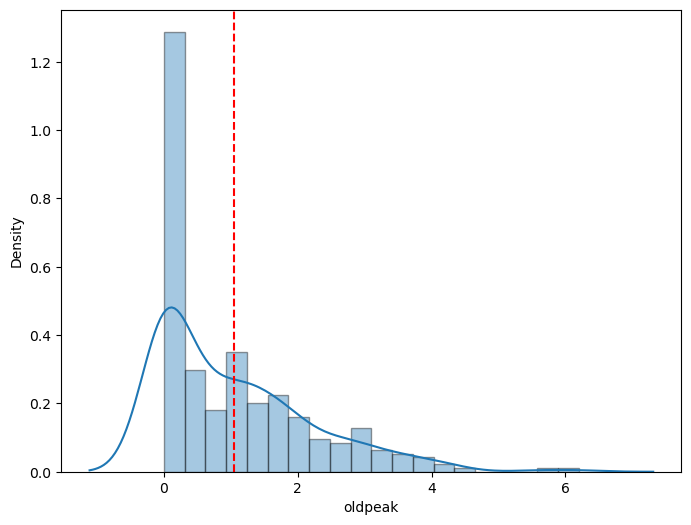

In [145]:
x,y = plt.subplots(figsize = (8,6))
sns.distplot(df["oldpeak"],hist_kws = dict(linewidth=1,edgecolor = "k"),bins=20,ax=y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--")

#### Exploratory Data Analysis

In [148]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [160]:
numeric_axis_name = ["Age of the Patient","Resting Blood Pressure","Cholesterol","Maximum Heart Rate Achievede" , "ST Depression"]

In [162]:
list(zip(numeric_var,numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achievede'),
 ('oldpeak', 'ST Depression')]

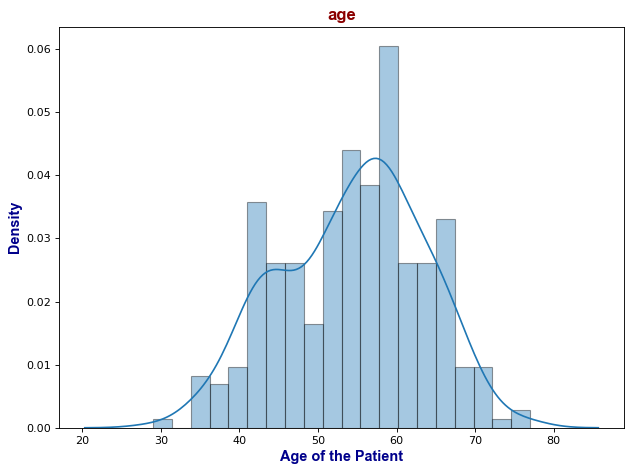

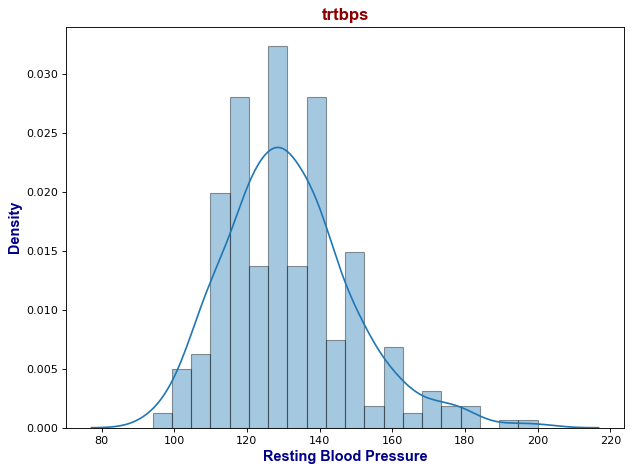

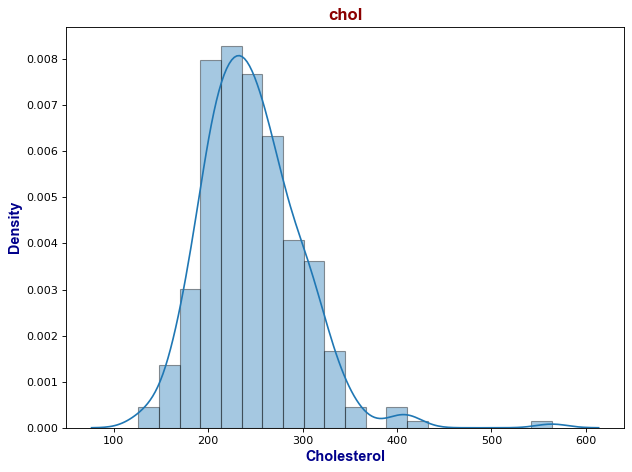

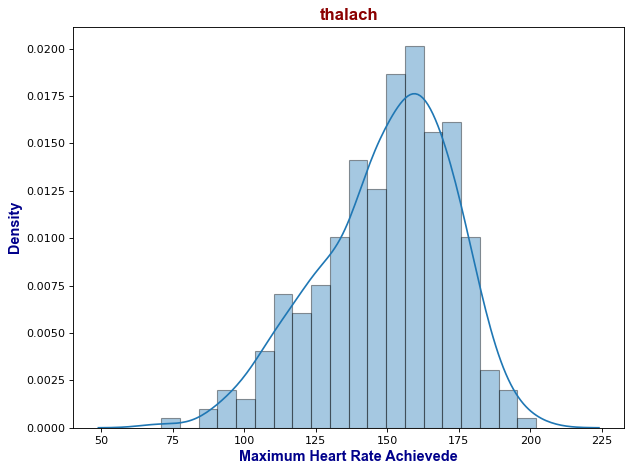

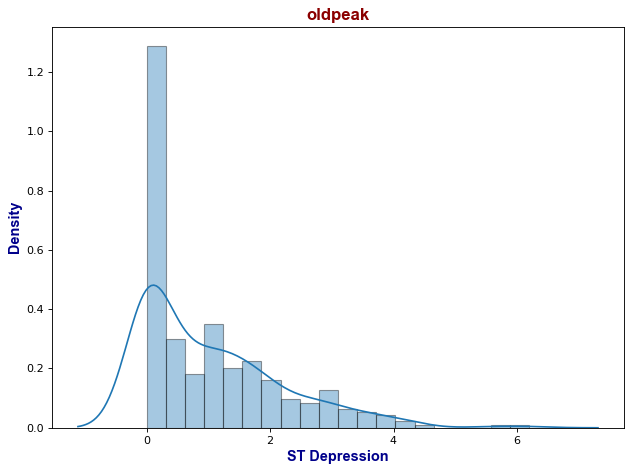

In [166]:
title_font = {"family" : "arial","color" : "darkred","weight": "bold","size" : 15}
axis_font = {"family" : "arial","color" : "darkblue","weight": "bold","size" : 13}

for i,z in list(zip(numeric_var,numeric_axis_name)):
    plt.figure(figsize=(8,6),dpi=80)
    sns.distplot(df[i],hist_kws = dict(linewidth = 1, edgecolor = "k"),bins = 20)

    plt.title(i,fontdict = title_font)
    plt.xlabel(z,fontdict = axis_font)
    plt.ylabel("Density",fontdict = axis_font)

    plt.tight_layout()
    plt.show()